# Exploratory Data Analysis - BIKE SHARE SYSTEM ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt


In [3]:
hour_df=pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
pd.DataFrame({'mean': hour_df.mean(),
        'std.dev': hour_df.std(),
        'min':hour_df.min(),
        'max':hour_df.max(),
        'median': hour_df.median(),
        'length': len(hour_df),
         })

C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame({'mean': hour_df.mean(),
C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'std.dev': hour_df.std(),
C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'median': hour_df.median(),


,mean,std.dev,min,max,median,length
atemp,0.475775,0.171850,0.0,1.0,0.4848,17379
casual,35.676218,49.305030,0,367,17.0000,17379
cnt,189.463088,181.387599,1,977,142.0000,17379
dteday,NaN,NaN,1/1/2011,9/9/2012,NaN,17379
holiday,0.028770,0.167165,0,1,0.0000,17379
hr,11.546752,6.914405,0,23,12.0000,17379
hum,0.627229,0.192930,0.0,1.0,0.6300,17379
instant,8690.000000,5017.029500,1,17379,8690.0000,17379
mnth,6.537775,3.438776,1,12,7.0000,17379
registered,153.786869,151.357286,0,886,115.0000,17379


In [5]:
hour_df = hour_df.rename(columns={'weathersit':'weather_situation',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
hour_df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_situation', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Check logic of working day and weekday 

In [6]:
hour_df[['weekday', 'workingday']][hour_df['workingday'] == 0]

,weekday,workingday
0,6,0
1,6,0
2,6,0
3,6,0
4,6,0
...,...,...
17350,0,0
17351,0,0
17352,0,0
17353,0,0


Comment: 0 and 6 are Saturday and Sunday respectively

Convert working day and weekday from integer to string

In [7]:
def weekname(num):
    num = int(num)
    if num == 0:
        return 'Sunday'
    elif num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    else:
        return 'Saturday'
hour_df['weekday'] = hour_df['weekday'].apply(weekname)
hour_df['weekday']


0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
           ...   
17374      Monday
17375      Monday
17376      Monday
17377      Monday
17378      Monday
Name: weekday, Length: 17379, dtype: object

In [8]:
def weather_situation(num):
    num = int(num)
    if num == 1:
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif num == 2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif num == 3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

In [9]:
hour_df['weather_situation'] = hour_df['weather_situation'].apply(weather_situation)

In [10]:
def season(num):
    num = int(num)
    if num == 1:
        return 'winter'
    elif num == 2:
        return 'spring'
    elif num == 3:
        return 'summer'
    else:
        return 'fall'

In [11]:
hour_df['season'] = hour_df['season'].apply(season)
hour_df['season']

0        winter
1        winter
2        winter
3        winter
4        winter
          ...  
17374    winter
17375    winter
17376    winter
17377    winter
17378    winter
Name: season, Length: 17379, dtype: object

In [12]:
hour_df.shape

(17379, 17)

Data structure: 17379 rows and 17 columns 

Check for missing values

In [13]:
hour_df.isnull().sum()

instant              0
dteday               0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

Check data types

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season             17379 non-null  object 
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  object 
 8   workingday         17379 non-null  int64  
 9   weather_situation  17379 non-null  object 
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

Visualizing missing values

<AxesSubplot:>

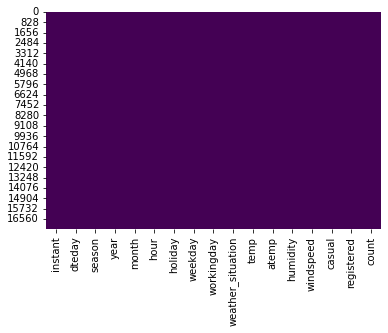

In [15]:
sns.heatmap(hour_df.isnull(),cbar=False,cmap='viridis')

Check the correlation between different variables

<AxesSubplot:>

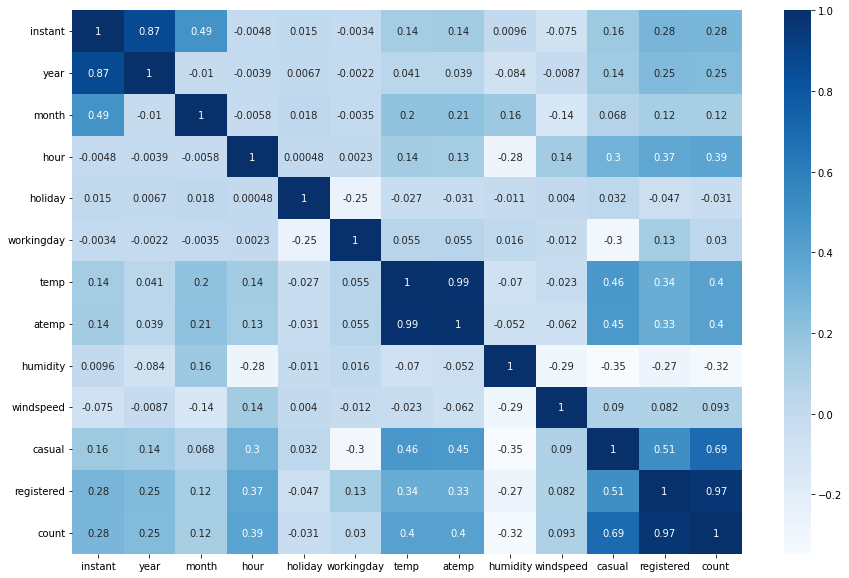

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(hour_df.corr(),cbar=True,annot=True,cmap='Blues')

Positive correlation:
1. count- instant, season, year, hour, temp, atemp, casual, registered
2. temp - season, month, hour, casual, registered, count
3. atemp - season, month, hour, casual, registered, count
4. casual - hour, temp, atemp, registered, count
5. registered - hour, temp, atemp, casual, count

Negative correlation:
1. registered - holiday, weather_situation, humidity
2. casual - workingday, weather_situation, humidity
3. holiday - season, weekday, workingday, weather_situation, temp, atemp, humid, registered, count
4. weather_situation - instant, season, year, hour, holiday, temp, atemp, casual, registered, count
5. humidity - year, hour, holiday, weekeday, temp, atemp, windspeed, casual, registered, count


# Outliers Analysis 

Distribution histograms and boxplots 

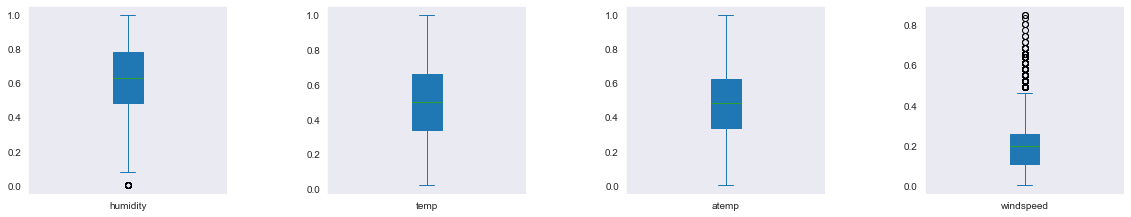

In [17]:
col_to_plot = ['humidity','temp','atemp','windspeed']
sns.set_style('dark')
hour_df[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);


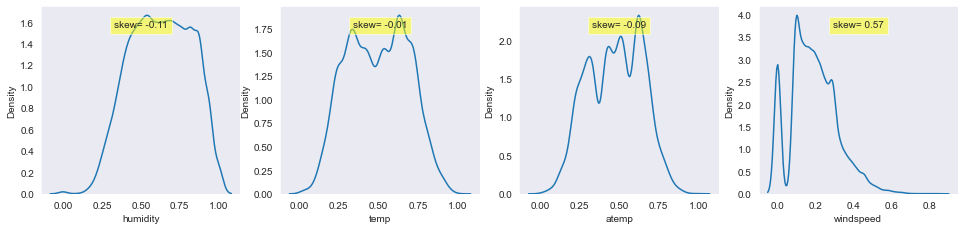

In [18]:
from scipy.stats import skew
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
plt.show()

dist_plot(hour_df,col_to_plot)


Remove outliers and reduce skewness by cap & floor 

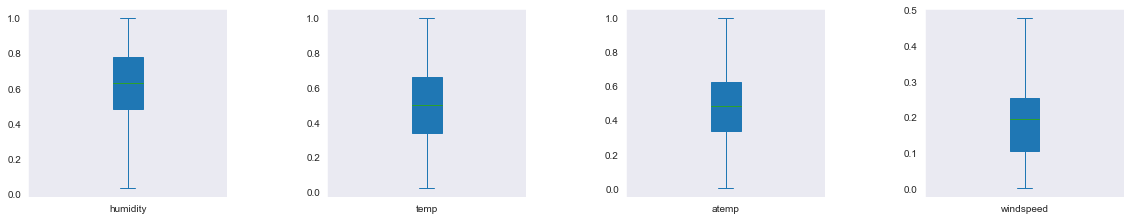

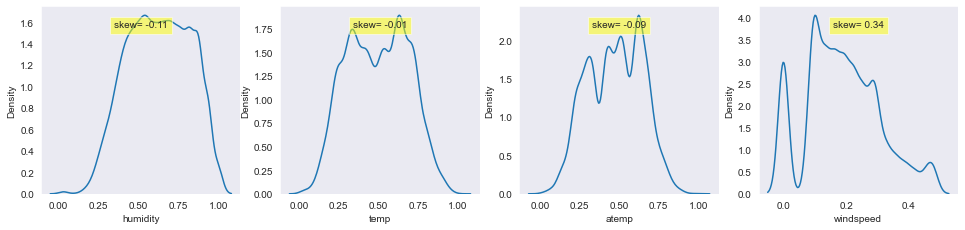

In [19]:
hour_cap = hour_df
features = ['humidity','temp','atemp','windspeed']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

iqr_capping(hour_cap, features, 1.5)

sns.set_style('dark')
hour_cap[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

dist_plot(hour_cap, col_to_plot)


Remove unimportant columns 

In [20]:
hour_df = hour_df.drop(columns = ['instant','dteday','year'])
hour_df.head()

,season,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,winter,1,0,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,winter,1,1,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,winter,1,2,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,winter,1,3,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,winter,1,4,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


Compute mean, standard deviation, min, max, median, length, and missing values of "casual" variable

In [21]:
print('mean:' , hour_df.casual.mean())
print('std.dev:' , hour_df.casual.std())
print('min:' , hour_df.casual.min())
print('max:' , hour_df.casual.max())
print('length:' , len(hour_df.casual))
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
print ('coeffcient:',cv(hour_df.casual))

mean: 35.67621842453536
std.dev: 49.30503038705308
min: 0
max: 367
length: 17379
coeffcient: 138.20139175161253


Compute mean, standard deviation, min, max, median and length of "registered" variable

In [22]:
print('mean:' , hour_df.registered.mean())
print('std.dev:' , hour_df.registered.std())
print('min:' , hour_df.registered.min())
print('max:' , hour_df.registered.max())
print('length:' , len(hour_df.registered))
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
print ('coeffcient:',cv(hour_df.registered))


mean: 153.78686920996606
std.dev: 151.35728591258314
min: 0
max: 886
length: 17379
coeffcient: 98.42016206593959


Compute mean, standard deviation, min, max, median, length, and missing values of all variables

In [23]:
pd.DataFrame({'mean': hour_df.mean(),
        'std.dev': hour_df.std(),
        'min':hour_df.min(),
        'max':hour_df.max(),
        'median': hour_df.median(),
        'length': len(hour_df),
         })

C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame({'mean': hour_df.mean(),
C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'std.dev': hour_df.std(),
C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_12264\2542129354.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'median': hour_df.median(),


,mean,std.dev,min,max,median,length
atemp,0.475775,0.171850,0.0,1.0,0.4848,17379
casual,35.676218,49.305030,0,367,17.0000,17379
count,189.463088,181.387599,1,977,142.0000,17379
holiday,0.028770,0.167165,0,1,0.0000,17379
hour,11.546752,6.914405,0,23,12.0000,17379
humidity,0.627267,0.192809,0.03,1.0,0.6300,17379
month,6.537775,3.438776,1,12,7.0000,17379
registered,153.786869,151.357286,0,886,115.0000,17379
season,NaN,NaN,fall,winter,NaN,17379
temp,0.496987,0.192556,0.02,1.0,0.5000,17379


Target variables

<AxesSubplot:xlabel='casual', ylabel='Count'>

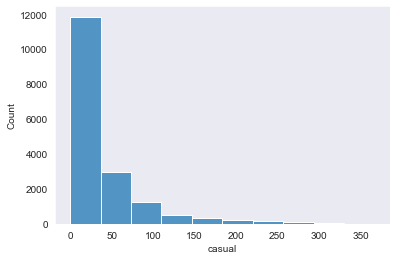

In [24]:
#casual
sns.histplot(hour_df.casual,bins=10)

<AxesSubplot:xlabel='registered', ylabel='Count'>

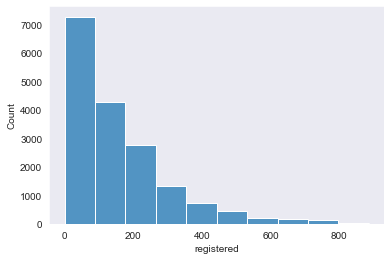

In [25]:
#registered
sns.histplot(hour_df.registered,bins=10)

# Count between hours, weather situation, season, and weekday of casual riders and registered riders

<AxesSubplot:xlabel='temp'>

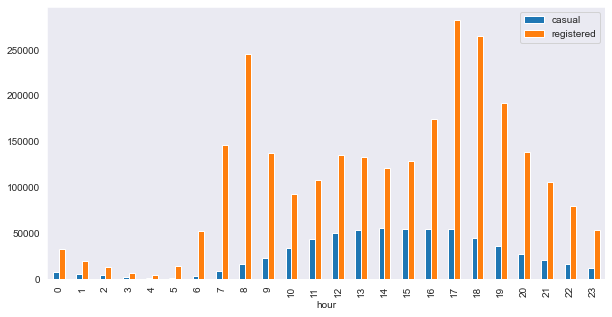

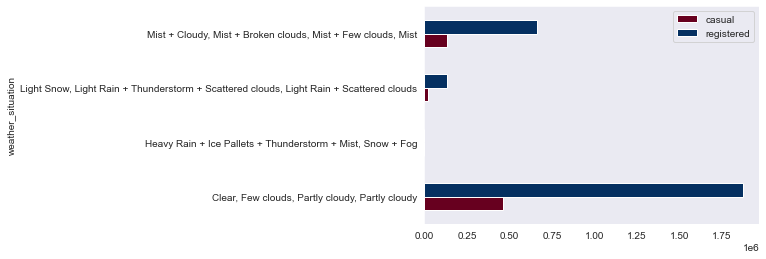

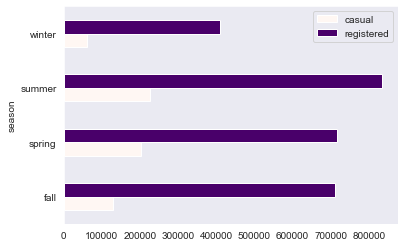

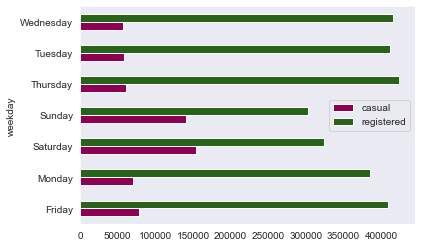

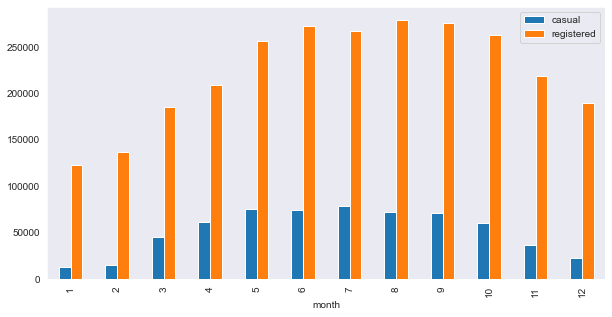

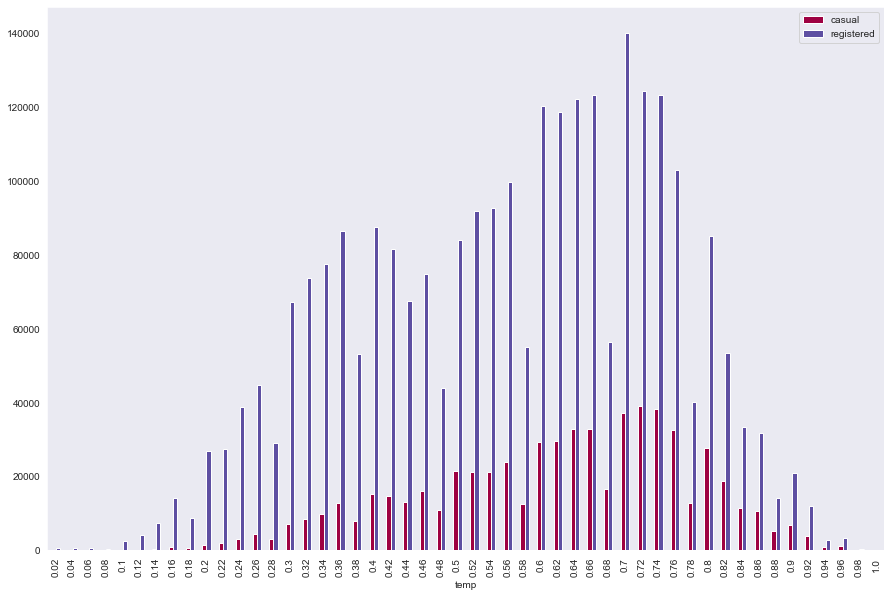

In [26]:
hour_df[['hour', 'casual','registered']].groupby(['hour']).sum().plot(kind = 'bar', figsize = (10,5))
hour_df[['weather_situation', 'casual','registered']].groupby(['weather_situation']).sum().plot(kind='barh', colormap='RdBu')
hour_df[['season', 'casual','registered']].groupby(['season']).sum().plot(kind='barh', colormap='RdPu')
hour_df[['weekday', 'casual','registered']].groupby(['weekday']).sum().plot(kind='barh', colormap='PiYG')
hour_df[['month', 'casual','registered']].groupby(['month']).sum().plot(kind = 'bar', figsize = (10,5))
hour_df[['temp', 'casual','registered']].groupby(['temp']).sum().plot(kind = 'bar', colormap= 'Spectral',figsize = (15,10))

In [27]:
hour_df[['season', 'casual','registered']].groupby(['season']).sum()

,casual,registered
season,,
fall,129782,711831
spring,203522,715067
summer,226091,835038
winter,60622,410726


In [28]:
hour_df[['hour', 'casual','registered']].groupby(['hour']).sum()

,casual,registered
hour,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


Comment:

- Casual riders tend to rent bikes between 10am to 8pm, when the weather is mist and clear. They are likely to ride during summer, spring and fall. Saturday and Sunday are the dominant days for casual riders.
- Registered riders tend to rent bikes between 7-9am, 4-7pm, when the weather is mist and clear; they ride all year around for 4 seasons. They literally use bike share everyday. 

Relationship seems to be logarithmic in nature.

<AxesSubplot:>

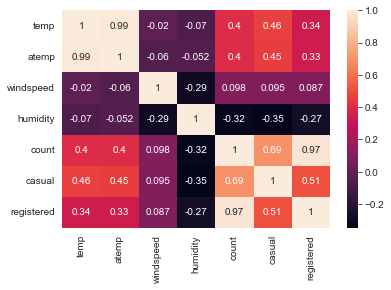

In [29]:
sns.heatmap(hour_df[["temp", "atemp", "windspeed", "humidity", "count","casual",'registered']].corr(), annot=True)